In [36]:
# imports
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('../data/all_currencies.csv', index_col=0)
df

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
...,...,...,...,...,...,...,...,...
298,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
299,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
300,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
301,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0


In [3]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [4]:
df['Market Cap'].isna().value_counts()

False    567841
True      64377
Name: Market Cap, dtype: int64

In [5]:
df.Symbol.nunique()

887

In [6]:
df.Symbol.value_counts()[:70]

NMC     1979
BTC     1979
LTC     1979
NVC     1978
PPC     1978
        ... 
ZEIT    1650
EFL     1647
SLR     1644
ECC     1644
NLG     1634
Name: Symbol, Length: 70, dtype: int64

In [7]:
max(df.Symbol)

'ZZC'

In [8]:
# # find coin threshold
# threshold = 0.8
# coins = coin_data_points > max(coin_data_points)*threshold
# coins_are_false = coins.values

# # remove coins where values are False
# coins.where(coins_are_false, inplace=True)
# coins.dropna(inplace=True)

# ts = df[df['Symbol'].isin(coins.index)]
# ts

In [9]:
coins_by_count = df['Symbol'].value_counts()
threshold = 0.8
# Only points with the most data points.
filt = coins_by_count > (threshold * max(coins_by_count))

most_common_coins = coins_by_count[filt]
ts = df[df['Symbol'].isin(most_common_coins.index)]
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [10]:
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


### Explore special values for BTC

In [11]:
# BTC eda
# create BTC  dataframe
btc = ts[ts['Symbol']=='BTC']

btc.shape

(1979, 8)

In [12]:
btc.Date

0       2013-04-28
1       2013-04-29
2       2013-04-30
3       2013-05-01
4       2013-05-02
           ...    
1974    2018-09-23
1975    2018-09-24
1976    2018-09-25
1977    2018-09-26
1978    2018-09-27
Name: Date, Length: 1979, dtype: object

In [13]:
btc.Date > "2013-05"

0       False
1       False
2       False
3        True
4        True
        ...  
1974     True
1975     True
1976     True
1977     True
1978     True
Name: Date, Length: 1979, dtype: bool

In [14]:
btc

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,BTC,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,BTC,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,BTC,144.00,146.93,134.05,139.00,NaN,1.597780e+09
3,2013-05-01,BTC,139.00,139.89,107.72,116.99,NaN,1.542820e+09
4,2013-05-02,BTC,116.38,125.60,92.28,105.21,NaN,1.292190e+09
...,...,...,...,...,...,...,...,...
1974,2018-09-23,BTC,6715.32,6766.15,6679.42,6710.63,4.197500e+09,1.160587e+11
1975,2018-09-24,BTC,6704.77,6713.56,6580.90,6595.41,4.177310e+09,1.158892e+11
1976,2018-09-25,BTC,6603.64,6603.64,6381.86,6446.47,4.726180e+09,1.141533e+11
1977,2018-09-26,BTC,6452.79,6585.91,6397.89,6495.00,4.437300e+09,1.115592e+11


In [15]:
max(btc.Date)

'2018-09-27'

In [16]:
#check date of initial data point
min(btc.Date)

'2013-04-28'

In [17]:
#check date of most recent data point
max_date = max(btc.Date)
max_date

'2018-09-27'

In [18]:
btc.loc[btc['Date']==max_date, 'Close']

1978    6676.75
Name: Close, dtype: float64

In [19]:
btc.Close[-1:]

1978    6676.75
Name: Close, dtype: float64

In [20]:
# create empty dataframe for meta data]
# give data frame columns of special values
meta_data = pd.DataFrame(columns=['Symbol', 'Start Date', 'End Date', 'Start Value', 'End Value','ATH Date', 'ATL Date', 'ATH', 'ATL', 'Num_values'])

In [21]:
#test date
serg_date = df.iloc[-1]['Date']

In [22]:
serg_date

'2018-09-27'

In [ ]:
max(df.Date).strftime('%Y-%m-%d')

In [33]:
# find start, end dates and number of data points for each coin
i=0
for coin in ts.Symbol.unique():
    # instantiate list to add to metadata frame
    my_list = [coin]
    
    # get data for coin from big df
    df = ts[ts['Symbol'] == coin]

    # find start date
    start_date = min(df.Date) #.strftime('%Y-%m-%d')
    my_list.append(start_date)
    
    # find end date
    end_date = max(df.Date) #.strftime('%Y-%m-%d')
    my_list.append(end_date)
    
    # find starting value
    my_list.append(df.Open.iloc[0])

    # find ending value
    my_list.append(df.Close.iloc[-1])

    # find ATH date
    ath_date = df['Date'].loc[df['High'] == max(df['High'])]
    # get date only
    ath_date = ath_date.iloc[0] #.strftime('%Y-%m-%d')
    my_list.append(ath_date)
    
    
    # find ATL date
    atl_date = df['Date'].loc[df['Low'] == min(df['Low'])]
    # get date only
    atl_date = atl_date.iloc[0] #.strftime('%Y-%m-%d')
    my_list.append(atl_date)
    
    # find all time high
    my_list.append(max(df.High))

    # find all time low
    my_list.append(min(df.Low))

    # find number of entries
    my_list.append(df.shape[0])

    # add coin info to dataframe
    meta_data.loc[i] = my_list
#     print(coin)
    i+=1
        
meta_data

,Symbol,Start Date,End Date,Start Value,End Value,ATH Date,ATL Date,ATH,ATL,Num_values
0,42,2014-01-14,2018-09-27,1.013620e+06,24176.000000,2014-01-14,2016-05-12,1.146320e+06,8.990000e+00,1703
1,AC,2014-04-20,2018-09-27,5.434000e-03,0.002804,2018-01-15,2015-02-01,4.646900e-02,1.170000e-04,1596
2,ANC,2013-07-15,2018-09-27,2.806800e-02,1.600000,2013-12-02,2017-03-25,1.293000e+01,5.918000e-03,1885
3,ARG,2013-07-04,2018-09-27,7.780000e-03,0.108349,2013-12-01,2013-07-16,1.160000e+00,2.280000e-04,1777
4,ARI,2014-02-20,2018-09-27,4.050000e-04,0.000534,2018-01-15,2016-12-07,2.910100e-02,8.000000e-06,1631
...,...,...,...,...,...,...,...,...,...,...
89,XPM,2013-07-11,2018-09-27,2.633760e-01,0.655008,2013-11-29,2015-04-15,7.580000e+00,1.775500e-02,1905
90,XRP,2013-08-04,2018-09-27,5.874000e-03,0.541381,2018-01-04,2014-07-07,3.840000e+00,2.802000e-03,1881
91,XWC,2014-04-18,2018-09-27,2.732000e-03,0.093300,2017-12-19,2015-11-13,4.458950e-01,6.600000e-05,1620
92,ZEIT,2014-03-20,2018-09-27,6.000000e-06,0.000037,2017-06-06,2014-08-13,1.073000e-03,5.300000e-07,1650


In [35]:
meta_data

,Symbol,Start Date,End Date,Start Value,End Value,ATH Date,ATL Date,ATH,ATL,Num_values
0,42,2014-01-14,2018-09-27,1.013620e+06,24176.000000,2014-01-14,2016-05-12,1.146320e+06,8.990000e+00,1703
1,AC,2014-04-20,2018-09-27,5.434000e-03,0.002804,2018-01-15,2015-02-01,4.646900e-02,1.170000e-04,1596
2,ANC,2013-07-15,2018-09-27,2.806800e-02,1.600000,2013-12-02,2017-03-25,1.293000e+01,5.918000e-03,1885
3,ARG,2013-07-04,2018-09-27,7.780000e-03,0.108349,2013-12-01,2013-07-16,1.160000e+00,2.280000e-04,1777
4,ARI,2014-02-20,2018-09-27,4.050000e-04,0.000534,2018-01-15,2016-12-07,2.910100e-02,8.000000e-06,1631
...,...,...,...,...,...,...,...,...,...,...
89,XPM,2013-07-11,2018-09-27,2.633760e-01,0.655008,2013-11-29,2015-04-15,7.580000e+00,1.775500e-02,1905
90,XRP,2013-08-04,2018-09-27,5.874000e-03,0.541381,2018-01-04,2014-07-07,3.840000e+00,2.802000e-03,1881
91,XWC,2014-04-18,2018-09-27,2.732000e-03,0.093300,2017-12-19,2015-11-13,4.458950e-01,6.600000e-05,1620
92,ZEIT,2014-03-20,2018-09-27,6.000000e-06,0.000037,2017-06-06,2014-08-13,1.073000e-03,5.300000e-07,1650


In [37]:
ath = meta_data.ATH
atl = meta_data.ATL
num = meta_data.Num_values

<ipython-input-48-e56db072b0e2>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(ax[1,1].get_xticks(), rotation=45)


Text(0.5, 0.9, 'Highs, Lows vs Number of Data Points')

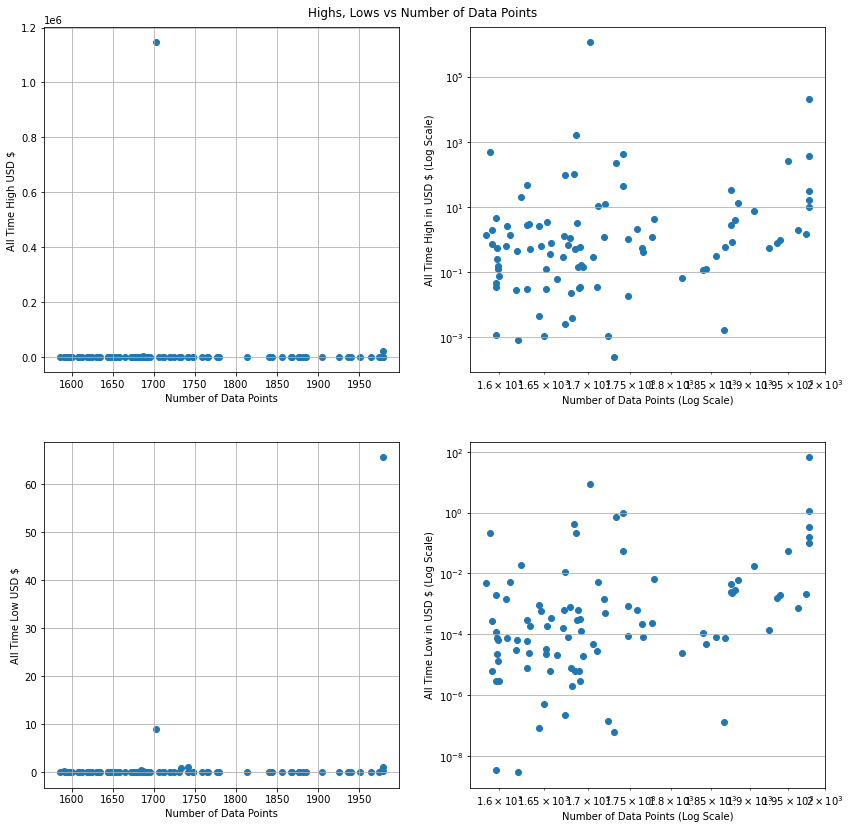

In [48]:
# plot ATH and ATL 
m = 2
n = 2
figsize = (14,14)
fig, ax = plt.subplots(nrows=m, ncols=n, figsize=figsize)

# turn grids on 
# for i in range(0,m):
#     for k in range(0,n):
#         ax[i,k].grid(True)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[1,0].grid(True)
ax[1,1].grid(True)


ax[0,0].scatter(num, ath)
ax[0,0].set_xlabel('Number of Data Points')
ax[0,0].set_ylabel('All Time High USD $')


ax[0,1].scatter(num, ath)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Number of Data Points (Log Scale)')
ax[0,1].set_ylabel('All Time High in USD $ (Log Scale)')
ax[0,1].tick_params(axis='x', labelrotation=45)

ax[1,0].scatter(num, atl)
ax[1,0].set_xlabel('Number of Data Points')
ax[1,0].set_ylabel('All Time Low USD $')

ax[1,1].scatter(num, atl)
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Number of Data Points (Log Scale)')
ax[1,1].set_ylabel('All Time Low in USD $ (Log Scale)')
ax[1,1].set_xticklabels(ax[1,1].get_xticks(), rotation=45)
# ax[1,1].tick_params(axis='x', labelrotation=45)

fig.suptitle('Highs, Lows vs Number of Data Points', y=0.9)

In [39]:
x = [123, 670, 50, 327, 910]
INCREMENT = 500
hist = {}

for val in x:
  bin = (val // INCREMENT) * INCREMENT
  freq = hist.get(bin, 0) + 1
  hist[bin] = freq

hist

{0: 3, 500: 2}

Text(0, 0.5, 'Number of Coins')

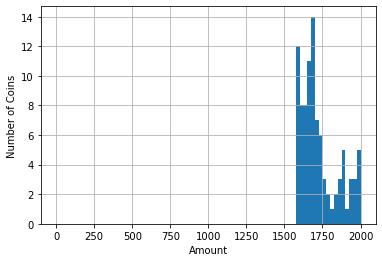

In [27]:
interval = 25

nbins = 2000//interval
bins=[interval*x for x in range(0,nbins+1)]

meta_data['Num_values'].hist(bins=bins)
plt.xlabel('Amount')
plt.ylabel('Number of Coins')

Text(0.5, 1.0, 'Coins Grouped by Amount of Data')

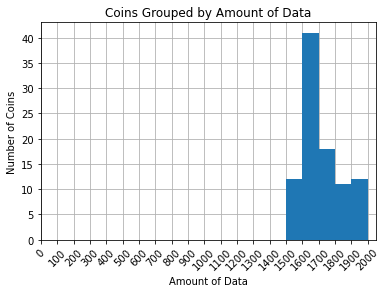

In [28]:
# create histogram to show various distributions of coins
fig, ax = plt.subplots()

interval = 100

nbins = 2000//interval
bins=[interval*x for x in range(0,nbins+1)]

ax.hist(num, bins=bins, range=(0,2100))

ax.set_xlim(0,2050)
ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=45)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Amount of Data')
ax.set_ylabel('Number of Coins')
ax.set_title('Coins Grouped by Amount of Data')

Text(0.5, 0, 'All Time High in USD $$$')

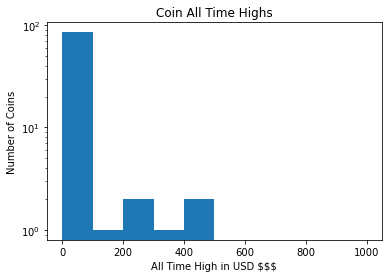

In [29]:
# graph ATH and ATL histogram
fig, ax = plt.subplots()

ax.hist(ath, range=(0, 10**3))
ax.set_yscale('log')
ax.set_title('Coin All Time Highs')
ax.set_ylabel('Number of Coins')
ax.set_xlabel('All Time High in USD $$$')

In [30]:
# ts.sort_values('Low', ascending=False)

In [31]:
# meta_data.sort_values('ATL', ascending=False)

In [32]:
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [34]:
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [56]:
df.head(100)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,BTC,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,BTC,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,BTC,144.00,146.93,134.05,139.00,NaN,1.597780e+09
3,2013-05-01,BTC,139.00,139.89,107.72,116.99,NaN,1.542820e+09
4,2013-05-02,BTC,116.38,125.60,92.28,105.21,NaN,1.292190e+09
...,...,...,...,...,...,...,...,...
95,2013-08-01,BTC,106.21,108.00,103.01,104.00,NaN,1.220190e+09
96,2013-08-02,BTC,104.86,108.00,101.21,104.50,NaN,1.205070e+09
97,2013-08-03,BTC,104.50,105.78,102.00,104.00,NaN,1.201490e+09
98,2013-08-04,BTC,104.95,105.95,103.52,105.14,NaN,1.207100e+09


In [51]:
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [55]:
ts.Date

0      2014-01-14
1      2014-01-15
2      2014-01-16
3      2014-01-17
4      2014-01-18
          ...    
1835   2018-09-23
1836   2018-09-24
1837   2018-09-25
1838   2018-09-26
1839   2018-09-27
Name: Date, Length: 162290, dtype: datetime64[ns]

In [52]:
ts.Date.iloc[1]

Timestamp('2014-01-15 00:00:00')

In [54]:
ts.Date[1839]

1839   2018-08-13
1839   2018-06-08
1839   2018-05-11
1839   2018-08-22
1839   2018-06-23
1839   2018-08-25
1839   2018-05-16
1839   2018-07-04
1839   2018-08-31
1839   2018-08-21
1839   2018-05-11
1839   2018-07-25
1839   2018-05-11
1839   2018-05-12
1839   2018-05-12
1839   2018-09-23
1839   2018-09-11
1839   2018-05-26
1839   2018-06-19
1839   2018-07-24
1839   2018-08-17
1839   2018-09-27
Name: Date, dtype: datetime64[ns]

In [49]:
ts.Date[0] == ts.Date.loc[0]

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Name: Date, Length: 94, dtype: bool

In [44]:
type(ts.Date)

pandas.core.series.Series

In [37]:
# ts['Date'] = pd.to_datetime(ts['Date'])

<ipython-input-37-aed304f7b699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Date'] = pd.to_datetime(ts['Date'])


In [39]:
ts_new = ts
ts_new

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [40]:
# reindex by Datetime 
ts_new = ts.set_index('Date', drop=True)
ts_new

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...
2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0


In [43]:
type(ts_new.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
ts_new.head()

In [40]:
ts_new.set_index(pd.to_datetime(ts['Date']), drop=True, inplace=True)

In [41]:
ts_new

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2014-01-14,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
2014-01-15,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2014-01-16,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
2014-01-17,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
2014-01-18,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
2018-09-23,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
2018-09-24,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
2018-09-25,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0


In [ ]:
ts.resample('D')

In [ ]:
ts.resample('M')

In [ ]:
ts

In [ ]:
ts.resample('Y')

In [ ]:
ts.resample('D').count()